In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
import healpy as hp
import tqdm
import h5py
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
#mpl.rcParams['figure.figsize'] = (6, 4)

%load_ext autoreload
%autoreload 2

In [2]:
import sys
import h5py
import numpy as np

lmax = 5
nside = 4
M = 10
C = 3
lengthscale = 0.3 # in units of magnitudes

# Load in data and format
with h5py.File('./rvs_grid.h5', 'r') as g:
    
    # Load data
    box = {k:v[:] for k,v in g.items()}
    print(box.keys())
    M_original, C_original = box['k'].shape[:2]
    
    # Calculate lengthscales in units of bins
    lengthscale_m = lengthscale/((box['phot_rp_mean_mag'][1]-box['phot_rp_mean_mag'][0])*(M_original/M))
    lengthscale_c = lengthscale/((box['bp_rp'][1]-box['bp_rp'][0])*(C_original/C))
    print('Lengthscales',lengthscale_m,lengthscale_c)


dict_keys(['bp_rp', 'healpix', 'k', 'n', 'phot_rp_mean_mag', 'rvs'])
Lengthscales 0.30000000000000104 0.3


In [ ]:
# Import hammer
from SelectionFunctionHammer import Hammer
hammer = Hammer(k = box['k'],
                n = box['n'],
                axes = ['magnitude','colour','position'],
                nest = True,
                lmax = lmax,
                lengthscale_m = lengthscale_m,
                lengthscale_c = lengthscale_c,
                M = M,
                C = C,
                nside = nside,
                sparse = True,
                pivot = True,
                mu = 0.0,
                sigma = [1.0,1.0,1.5],
                file_root = f"lmax{lmax}_nside{nside}_M{M}_C{C}_l{lengthscale}",
                )


In [51]:
# Import hammer
from SelectionFunctionHammer import Hammer
hammer = Hammer(k = box['k'].sum(axis=(0,1)),
                n = box['n'].sum(axis=(0,1)),
                axes = ['position'],
                nest = True,
                lmax = lmax,
                nside = nside,
                sparse = True,
                pivot = True,
                mu = 0.0,
                sigma_params = [1.0,1.0,1.5],
                file_root = f"lmax{lmax}_nside{nside}_l{lengthscale}",
                )

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /Users/douglasboubert/Science/gaia-selection-function/astrometry/SphHarmonics/StanModels/magnitude_colour_position_sparse


Spherical harmonic file loaded
0.00% sparsity
0.00% sparsity


In [52]:
hammer.optimize(number_of_iterations=10000)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Running optimisation
Finished optimisation, it took 0.0 seconds
Convergence information stored in ./StanOutput/lmax5_nside4_l0.3_convergence.txt
Optimum values stored in ./StanOutput/lmax5_nside4_l0.3_results.h5


In [53]:
hammer.print_convergence(number_of_lines=10)

Error evaluating model log probability: Non-finite function evaluation.

Error evaluating model log probability: Non-finite function evaluation.

Error evaluating model log probability: Non-finite function evaluation.

Error evaluating model log probability: Non-finite function evaluation.

Error evaluating model log probability: Non-finite function evaluation.

Error evaluating model log probability: Non-finite function evaluation.



      33  -2.68406e+07   0.000322687       123.579      0.3181           1       45   

Optimization terminated normally: 

  Convergence detected: relative gradient magnitude is below tolerance



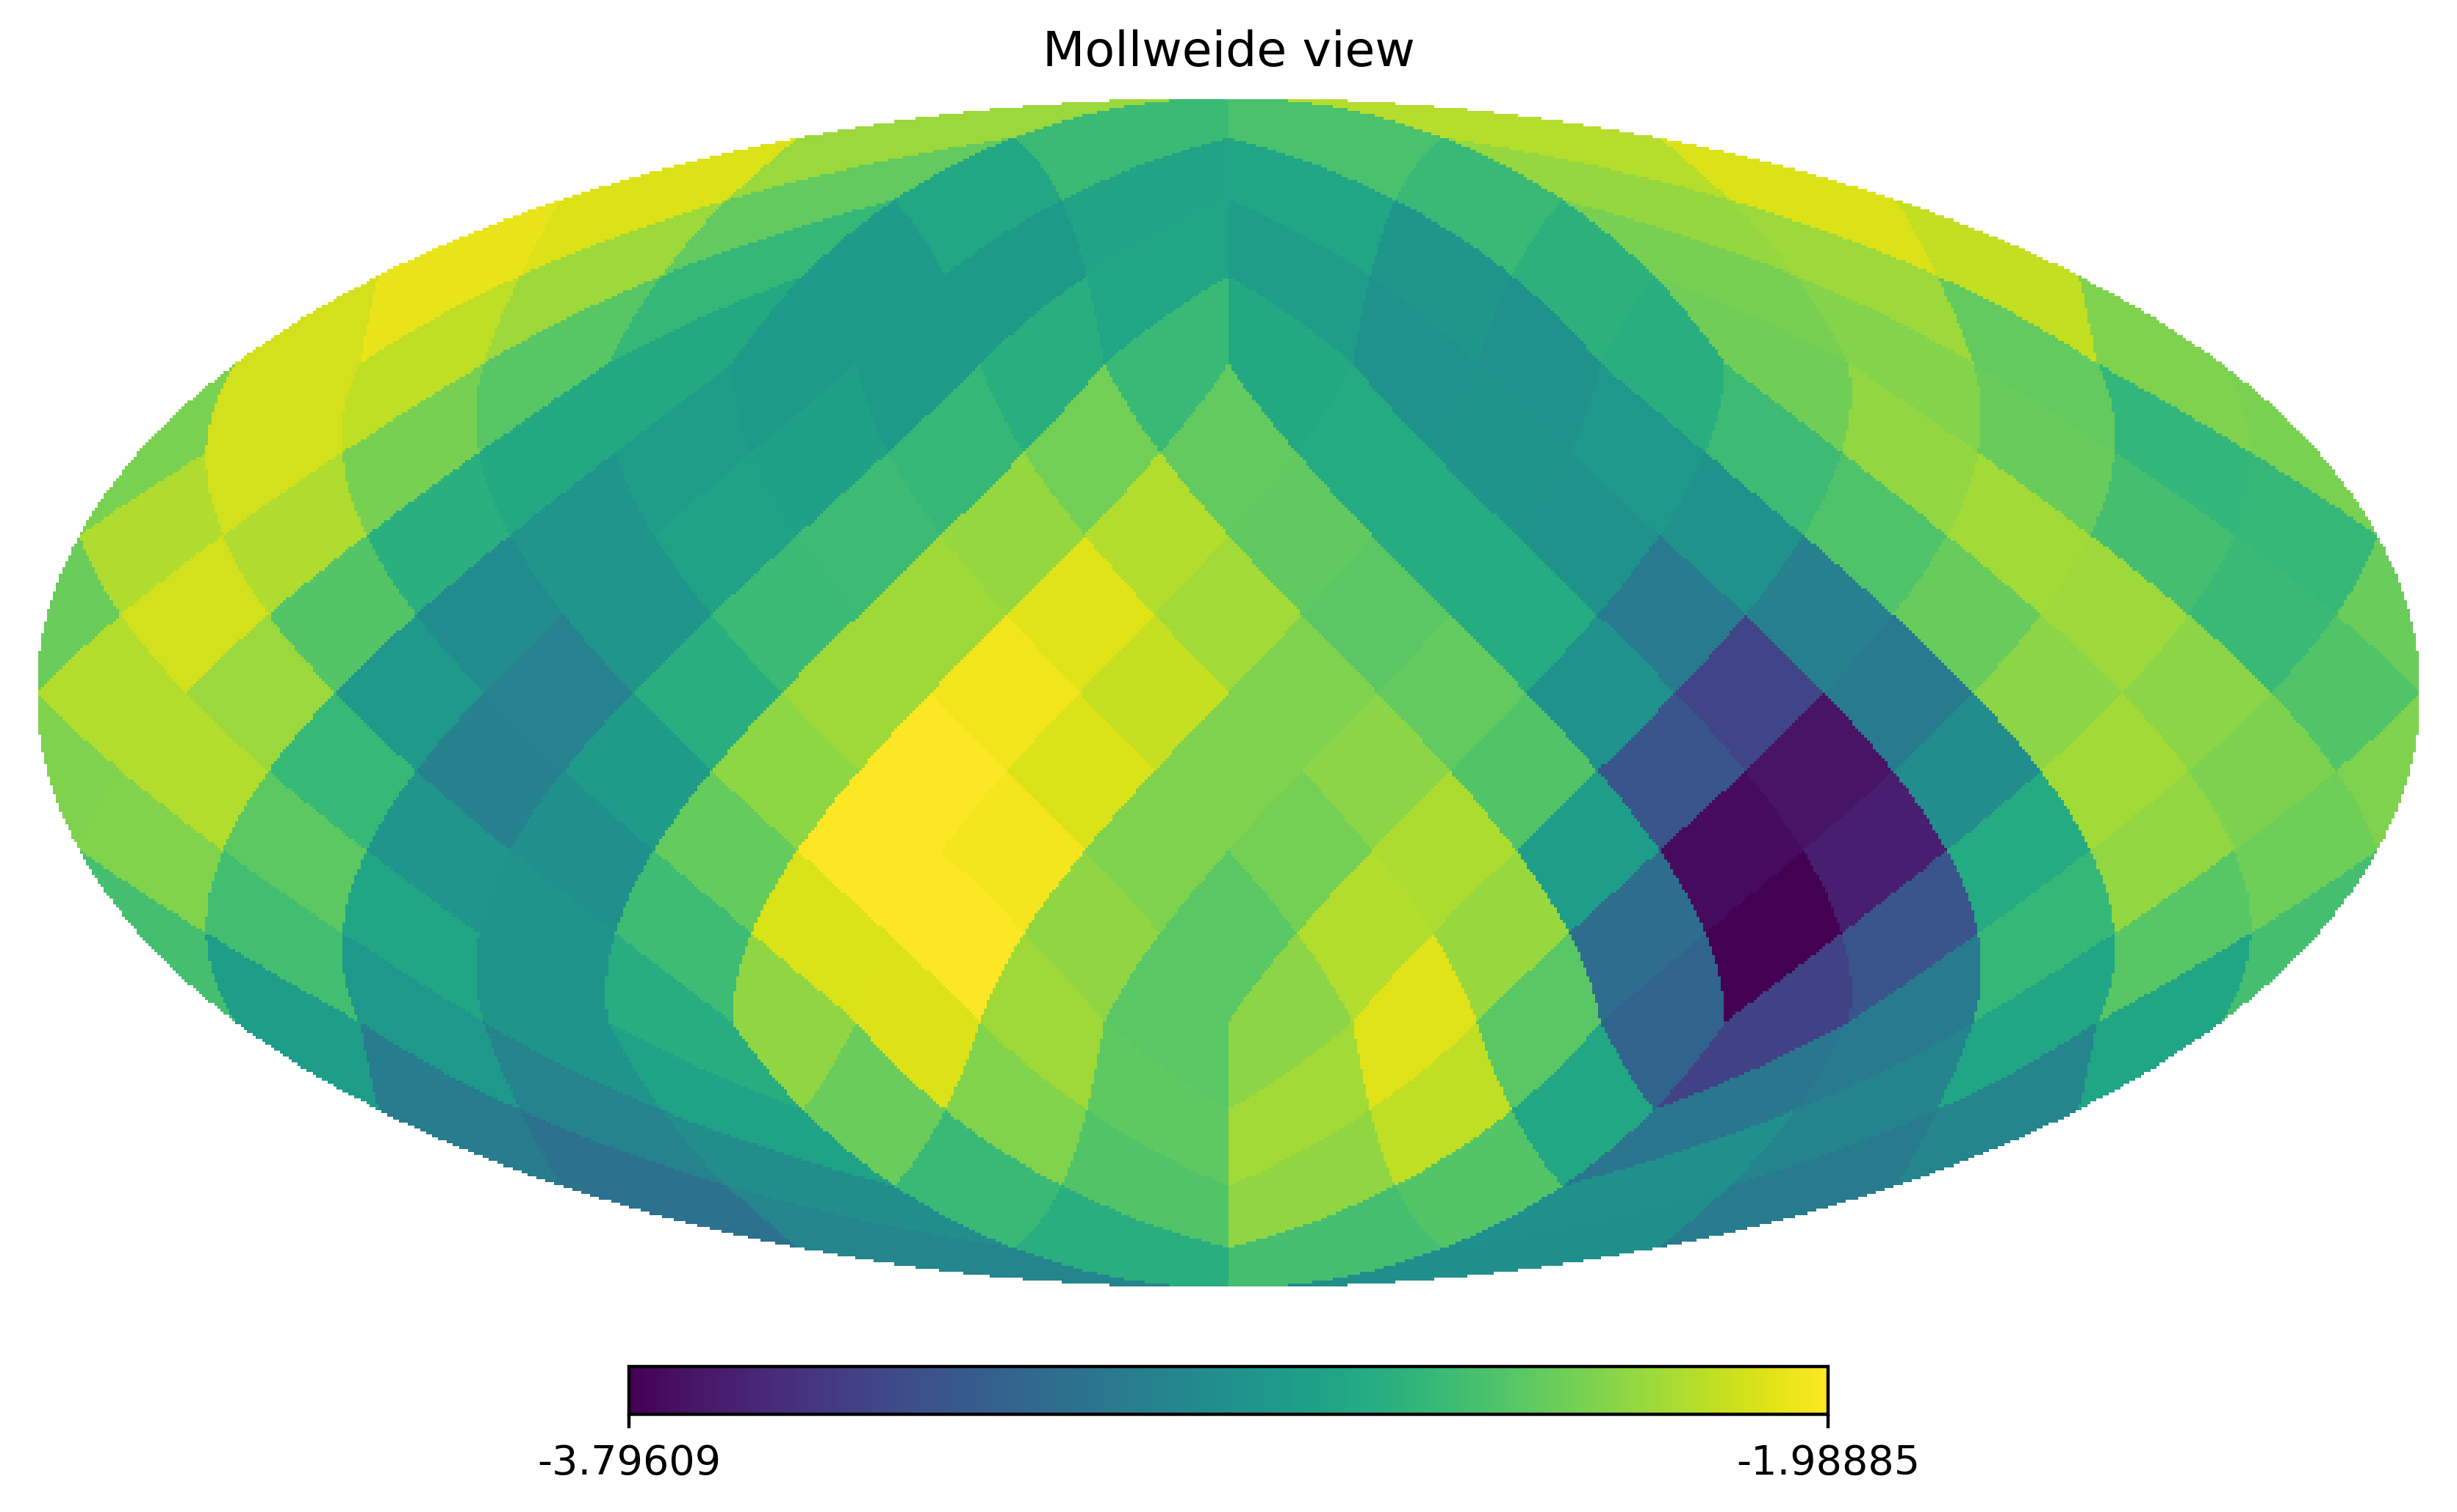

In [56]:
hp.mollview(hammer.optimum_x[0,0],nest=True)